In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras import layers
from keras import models
from keras.datasets import cifar10
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
BATCH_SIZE = 16 

EPOCHS = 10

COLORS = 3

In [5]:
from tensorflow import keras
from keras.layers import Dense, Conv2D
from keras.layers import BatchNormalization, Flatten, Dropout, MaxPooling2D, UpSampling2D
from keras.layers import RandomFlip, RandomHeight, RandomCrop, RandomRotation, RandomZoom, RandomWidth
from keras import Sequential
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy

In [6]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import optimizers

conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
# conv_base.summary()

In [7]:
model = Sequential([
    UpSampling2D((2,2)),
    UpSampling2D((2,2)),
    UpSampling2D((2,2)),
    conv_base,
    Flatten(),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(10, activation='softmax')
    ])

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='categorical_crossentropy', metrics=['acc'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 50000
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(train_images, train_labels, batch_size)
steps_per_epoch = train_images.shape[0] // batch_size

In [10]:
from numpy import hstack # add Data
from numpy import vstack # add variables
train_images, train_label = vstack((train_images, train_generator[0][0])), vstack((train_labels, train_generator[0][1]))

In [12]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_images,
                                                              train_label,
                                                              test_size=0.15,
                                                              random_state=13
                                                              )
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((85000, 32, 32, 3), (15000, 32, 32, 3), (85000, 10), (15000, 10))

In [13]:
history = model.fit(train_X, train_label, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(valid_X, valid_label))

Epoch 1/10
5313/5313 [==============================] - 1059s 195ms/step - loss: 1.5493 - acc: 0.4883 - val_loss: 0.5802 - val_acc: 0.8345
Epoch 2/10
5313/5313 [==============================] - 1032s 194ms/step - loss: 0.9265 - acc: 0.7280 - val_loss: 0.3600 - val_acc: 0.8999
Epoch 3/10
5313/5313 [==============================] - 1031s 194ms/step - loss: 0.6800 - acc: 0.8143 - val_loss: 0.2328 - val_acc: 0.9347
Epoch 4/10
5313/5313 [==============================] - 1032s 194ms/step - loss: 0.5266 - acc: 0.8625 - val_loss: 0.1849 - val_acc: 0.9463
Epoch 5/10
5313/5313 [==============================] - 1032s 194ms/step - loss: 0.4155 - acc: 0.8968 - val_loss: 0.1649 - val_acc: 0.9513
Epoch 6/10
5313/5313 [==============================] - 1032s 194ms/step - loss: 0.3368 - acc: 0.9172 - val_loss: 0.1466 - val_acc: 0.9561
Epoch 7/10
5313/5313 [==============================] - 1029s 194ms/step - loss: 0.2742 - acc: 0.9340 - val_loss: 0.1486 - val_acc: 0.9577
Epoch 8/10
5313/5313 [=====

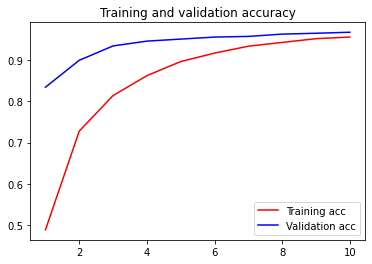

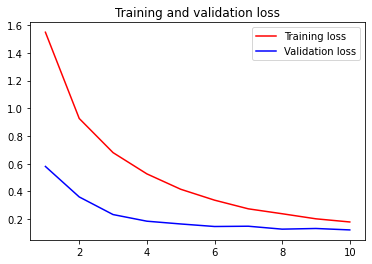

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

## Щойно навчена модель

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 23s 73ms/step - loss: 0.1997 - acc: 0.9506


313/313 [==============================] - 22s 70ms/step


[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

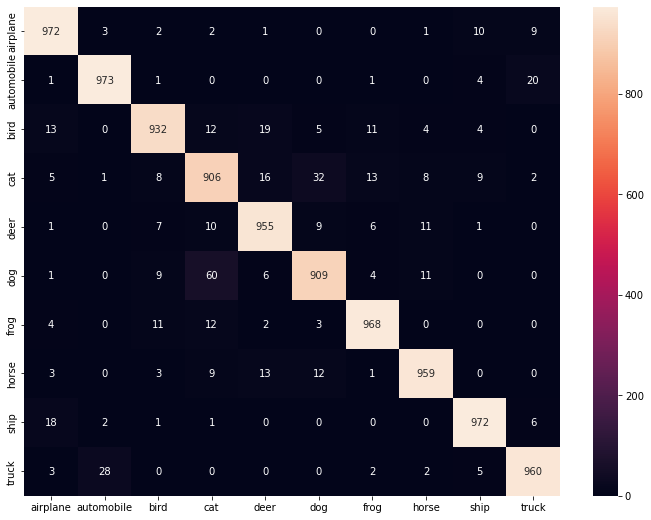

In [18]:
import seaborn as sns
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Predict the values from the validation dataset
y_pred = model.predict(test_images)
# Convert predictions classes to one hot vectors t_del
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(test_labels,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)

## Збереження моделі і вагів

In [19]:
model.save('C:/Users/kuzik/Desktop/project3/models/model_from_Susana_v3.h5')
model.save_weights('C:/Users/kuzik/Desktop/project3/models/weights_from_Susana_v3.h5')

## Тест завантаженої моделі

In [22]:
from keras.models import load_model

reload_model = load_model("C:/Users/kuzik/Desktop/project3/models/model_from_Susana_v3.h5")
reload_model.load_weights("C:/Users/kuzik/Desktop/project3/models/weights_from_Susana_v3.h5")

In [23]:
_, (test_x, test_y) = cifar10.load_data()

test_x = test_x.astype("float32") / 255
test_y = to_categorical(test_y)

reload_test_loss, reload_test_acc = reload_model.evaluate(test_x, test_y)

313/313 [==============================] - 24s 73ms/step - loss: 0.1997 - acc: 0.9506
